In [ ]:
!pip install opencv-python matplotlib seaborn panda numpy sklearn

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [20]:
nodding_df = pd.read_csv("../mediapipe/csv_data/NODDING.csv")
handwave_df = pd.read_csv("../mediapipe/csv_data/WAVE.csv")
nothing_df = pd.read_csv("../mediapipe/csv_data/NOTHING.csv")

In [21]:
no_of_timestep = 10
X = []
y = []

# Define labels
# 0 - nodding
# 1 - handwave
# 2 - nothing
nodding_data = nodding_df.iloc[:,:].values
for i in range(no_of_timestep, len(nodding_data)):
    X.append(nodding_data[i-no_of_timestep:i,:])
    y.append(0)

handwave_data = handwave_df.iloc[:,:].values
for i in range(no_of_timestep, len(handwave_data)):
    X.append(handwave_data[i-no_of_timestep:i,:])
    y.append(1)

nothing_data = nothing_df.iloc[:,:].values
for i in range(no_of_timestep, len(nothing_data)):
    X.append(nothing_data[i-no_of_timestep:i,:])
    y.append(2)

X, y = np.array(X), np.array(y)
X.shape

(1770, 10, 132)

In [22]:
# Architect model
NUM_OF_CLASSES = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(NUM_OF_CLASSES, activation="softmax"))
model.compile(optimizer="adam", metrics = ['accuracy'], loss = "categorical_crossentropy")


In [23]:
history = model.fit(X_train, y_train, epochs=16, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/16
45/45 [==============================] - 11s 42ms/step - loss: 0.5002 - accuracy: 0.7994 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 2/16
45/45 [==============================] - 1s 21ms/step - loss: 0.0947 - accuracy: 0.9753 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 3/16
45/45 [==============================] - 1s 21ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/16
45/45 [==============================] - 1s 21ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/16
45/45 [==============================] - 1s 21ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/16
45/45 [==============================] - 1s 21ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/16
45/45 [==============================] - 1s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 8.0693e-04 - val_accuracy: 1.0000
Epoch 8/

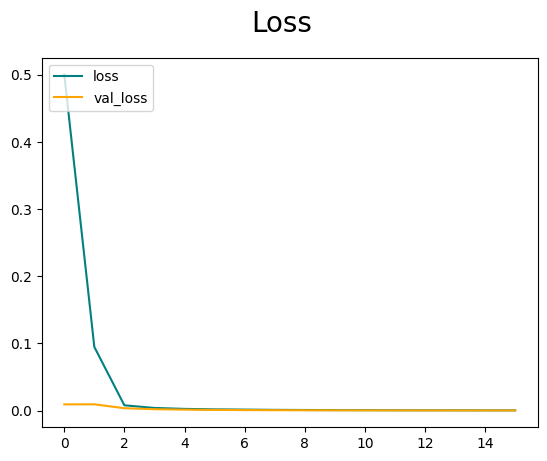

In [24]:
# loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

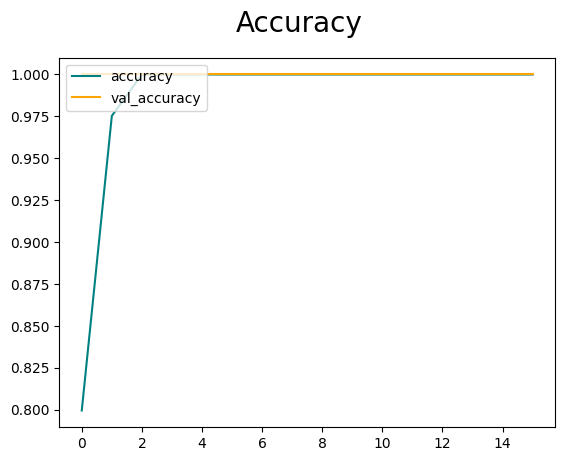

In [25]:
# Accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
model.save('./models/nodwave.h5')